# Advent of code 2024

It's time for AOC 2024! This time, I will put all answers in one notebook, so we can get a nice overview of runtimes and answers over time. To brighten things up a bit, I added some (AI generated) images corresponding to the problem description. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import backend

backend.run_results = list()

<img src='notebook_images/day1.webp'/>

# Day 1 : <a href="https://adventofcode.com/2024/day/1">Historian Hysteria</a>

## Part 1

For our first problem we will need to sort two lists, and take the sum of each pair of numbers in the sorted lists. Again, I will use my file parser to convert the input to some tuples, and convert them into a NumPy array.

In [2]:
test_input = np.array(backend.parseInput("""3   4
4   3
2   5
1   3
3   9
3   3""", backend.parseInts))

def day_1_part_1(input : np.array):
    sorted_input = np.sort(input, axis = 0)
    return(np.abs(sorted_input[:,1] - sorted_input[:, 0]).sum())

backend.test(day_1_part_1, test_input, 11)


__________ Input to be parsed __________
3   4
4   3
2   5
1   3
3   9
... and maybe more
____________________
__________ Parsed input __________
(3, 4)
(4, 3)
(2, 5)
(1, 3)
(3, 9)
... and maybe more
____________________
Answer: 11            0.000115 seconds
Test succeeded.


In [3]:
real_input = np.array(backend.parseInput(open("inputs/day1.txt").read(), backend.parseInts))

backend.run(day_1_part_1, real_input, 1, 1)

__________ Input to be parsed __________
76309   75213
79731   28444
29583   71339
60992   99148
34680   74530
... and maybe more
____________________
__________ Parsed input __________
(76309, 75213)
(79731, 28444)
(29583, 71339)
(60992, 99148)
(34680, 74530)
... and maybe more
____________________
Answer for day 1 part 1: 1110981            0.000174 seconds


1110981

That was easy! Now on to part 2.

## Part 2

It turns out that our first list contains ID's and we need to count each ID in the second list. We multiply the ID by the number of occurences in the second list, to obtain the <b>Similarity score</b>.

In [4]:
def day_1_part_2(input : np.array):
    first_list, second_list = input[:, 0], input[:, 1]
    frequency_list = np.array([np.sum(second_list == key) for key in first_list])
    return np.sum(first_list * frequency_list)

backend.test(day_1_part_2, test_input, 31)

Answer: 31            0.000256 seconds
Test succeeded.


In [5]:
backend.run(day_1_part_2, real_input, 1, 2)

Answer for day 1 part 2: 24869388            0.016389 seconds


24869388

Day 1 was quite doable, as ever with AOC. Let's see what day 2 brings us!

<img src='notebook_images/day2.webp'/>

# Day 2 : <a href="https://adventofcode.com/2024/day/2">Red-Nosed Reports</a>

Today, we are tasked with classifying reports whether they are either <b>safe</b> or <b>unsafe</b>.
Safe reports contain numbers in strictly increasing or strictly decreasing order (i.e. monotonic), where the increments, or decrements do not exceed 3.

We can easily do this by using the `diff` function from numpy, and doing some checks on this array.

## Part 1


In [6]:
test_input = backend.parseInput("""7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9""", parseMethod = backend.parseInts)

def is_safe(a : np.array):
    diff_arr = np.diff(a)
    monotonic = min(diff_arr) * max(diff_arr) > 0
    safe_abs_change = max(np.abs(diff_arr)) <= 3
    return(monotonic * safe_abs_change)

def day_2_part_1(input):
    map_obj = map(is_safe, [np.array(data) for data in input])
    return(sum(map_obj))


backend.test(day_2_part_1, test_input, 2)

__________ Input to be parsed __________
7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
... and maybe more
____________________
__________ Parsed input __________
(7, 6, 4, 2, 1)
(1, 2, 7, 8, 9)
(9, 7, 6, 2, 1)
(1, 3, 2, 4, 5)
(8, 6, 4, 4, 1)
... and maybe more
____________________
Answer: 2            0.000264 seconds
Test succeeded.


In [7]:
real_input = backend.parseInput(open("inputs/day2.txt").read(), parseMethod = backend.parseInts)
backend.run(day_2_part_1, real_input, 2, 1)

__________ Input to be parsed __________
20 21 24 25 27 29 27
60 61 62 64 64
15 18 21 22 25 26 30
5 8 11 14 16 19 20 26
20 22 20 23 24
... and maybe more
____________________
__________ Parsed input __________
(20, 21, 24, 25, 27, 29, 27)
(60, 61, 62, 64, 64)
(15, 18, 21, 22, 25, 26, 30)
(5, 8, 11, 14, 16, 19, 20, 26)
(20, 22, 20, 23, 24)
... and maybe more
____________________
Answer for day 2 part 1: 526            0.023802 seconds


526

## Part 2

It turns out that the facility contains a <b>problem dampener</b>, that can remove a single element from a report to make it safe. We now need to figure out how many reports are safe after the problem dampener removed a single element from a report to make it safe (if possible).

In [8]:
def problem_dampener(a : np.array):
    if is_safe(a) : return True
    # a is not a safe report
    b = map(lambda i : is_safe(np.delete(a, i)), np.arange(len(a)))
    return(sum(b) > 0) # Returns if the problem dampener can make 'a' safe.

def day_2_part_2(input):
    map_obj = map(problem_dampener, [np.array(data) for data in input])
    return(sum(map_obj))

backend.test(day_2_part_2, test_input, 4)

Answer: 4            0.001318 seconds
Test succeeded.


In [9]:
backend.run(day_2_part_2, real_input, 2, 2)

Answer for day 2 part 2: 566            0.129552 seconds


566

# Statistics AOC 2024

In [10]:
backend.overall_results()

,Day,Part,Result,Time
0,1,1,1110981,0.000174
1,1,2,24869388,0.016389
2,2,1,526,0.023802
3,2,2,566,0.129552


In [11]:
backend.complexity_increase_per_day()

Day
1    94.408964
2     5.442864
Name: Time, dtype: float64

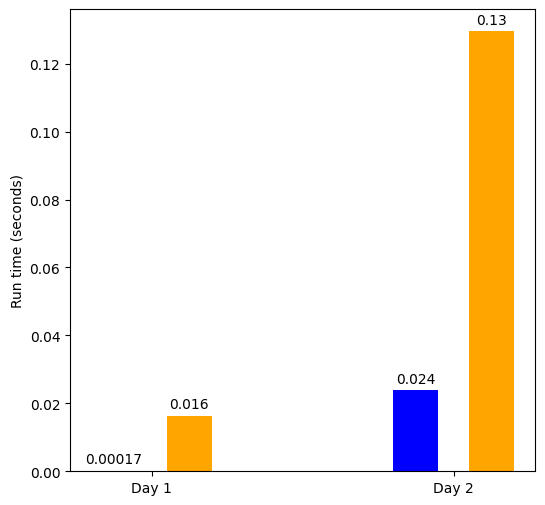

In [12]:
backend.plot_results()